![Alt text](../Project_2/stock-price-prediction-using-machine-learning.jpg)

## Project 2 - Machine Learning Stock Price Prediction
Creating a machine learning algorithm to predict the future stock price of a given stock. We will use an example with walmart dataset to create machine learning algorithm.

There are several types of machine learning that we can use such as:

* Linear Regression - This is a simple yet effective method for predicting stock prices based on historical data. Linear regression can model the relationship between the stock price and various predictors such as time, volume, and other market indicators.
* Artificial Neural Network (ANN) - ANN is a popular machine learning technique used for stock price prediction. ANNs can learn complex relationships between the input data and the target variable, and they can be trained to identify patterns and trends in the stock market.
* Support Vector Machine (SVM) - SVM is a machine learning algorithm that is widely used in finance for classification and regression tasks. SVMs can be used to predict the future price of a stock by analyzing its historical data and identifying patterns in the market.
* Time Series Analysis - Time series analysis is a statistical technique that is commonly used for predicting stock prices. It involves modeling the historical data as a time series and using it to forecast future prices.

First we import the libraries that we will use:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.datasets

import warnings
warnings.filterwarnings("ignore")

sns.set()

We then read the csv file for walmart stocks dataset and use head() to view the first 5 records to get an insight. From the table below it shows that there are 2829 records since 2012 to 2023. There are also 6 columns which are Date, Close, Open, High, Low and Volume.

In [2]:
df = pd.read_csv("../Project_2/walmart_stock.csv")

num_rows, num_cols = df.shape

print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)

Number of rows:  2829
Number of columns:  6


In [6]:
print(df.head(),"\n")

summary = df.describe()

print(summary)


       Date     Close      Open      High       Low      Volume
0  3/1/2012   $60.33    $59.97    $61.06    $59.87   12,668,774
1  4/1/2012   $59.71    $60.21    $60.35    $59.47    9,593,915
2  5/1/2012   $59.42    $59.35    $59.62    $58.37   12,768,202
3  6/1/2012   $59.00    $59.42    $59.45    $58.87    8,069,504
4  9/1/2012   $59.18    $59.03    $59.55    $58.92    6,679,713 

            Date     Close      Open      High       Low      Volume
count       2829      2829      2829      2829      2829        2829
unique      2829      2279      2240      2262      2257        2829
top     3/1/2012   $73.51    $74.84    $69.24    $74.51   12,668,774
freq           1         5         5         6         6           1


We can then find the datatype for each column and note that each are in string (object) type.

In [7]:
data_types = df.dtypes

print(data_types)


Date      object
Close     object
Open      object
High      object
Low       object
Volume    object
dtype: object


As we can see the data is in string (object) datatype, we can change the Date to date datatype and the others as float datatype as below

In [8]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove dollar sign and extra spaces from 'Close' column
df['Close'] = df['Close'].str.replace('$', '').str.strip()
df['Open'] = df['Open'].str.replace('$', '').str.strip()
df['High'] = df['High'].str.replace('$', '').str.strip()
df['Low'] = df['Low'].str.replace('$', '').str.strip()

# Remove commas from 'Volume' column
df['Volume'] = df['Volume'].str.replace(',', '')

# Convert the other columns to float format
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Volume'] = df['Volume'].astype(float)

# Check the data types of the columns
print(df.dtypes)

Date      datetime64[ns]
Close            float64
Open             float64
High             float64
Low              float64
Volume           float64
dtype: object


In [9]:
df.head()

,Date,Close,Open,High,Low,Volume
0,2012-03-01,60.33,59.97,61.06,59.87,12668774.0
1,2012-04-01,59.71,60.21,60.35,59.47,9593915.0
2,2012-05-01,59.42,59.35,59.62,58.37,12768202.0
3,2012-06-01,59.00,59.42,59.45,58.87,8069504.0
4,2012-09-01,59.18,59.03,59.55,58.92,6679713.0


We then plot a scatter plot to see the daily price of walmart stock 

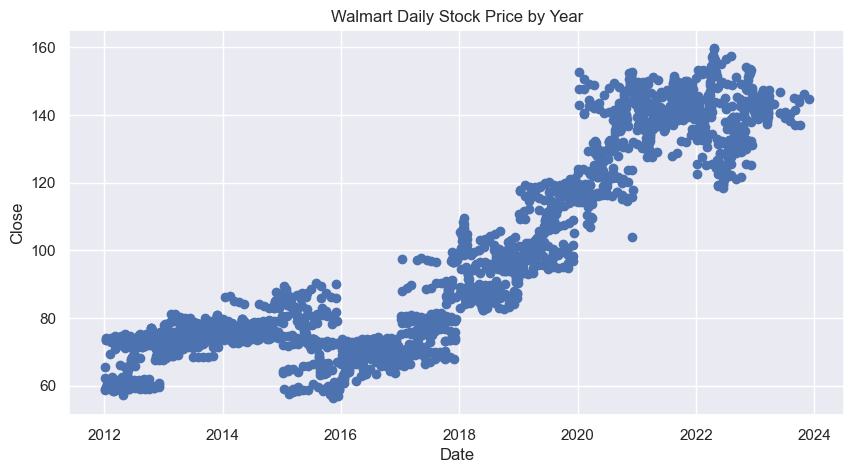

In [11]:
%matplotlib inline

# Set the figure size to (10, 5)
plt.figure(figsize=(10, 5))

# Create a scatter plot
plt.scatter(x=df["Date"], y=df["Close"])

# Add labels to the x and y axis
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Walmart Daily Stock Price by Year")

# Show the plot
plt.show()

We then choose our linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [13]:
x=df["Date"] 
y=df["Close"]

print("Shape of x: {}".format(x.shape))
print("Shape of y: {}".format(y.shape))

Shape of x: (2829,)
Shape of y: (2829,)


We then change the shape of x to 2D array

In [14]:
x = x[:,np.newaxis]
print("Shape of x: {}".format(x.shape))
print(x[:5])

Shape of x: (2829, 1)
[['2012-03-01T00:00:00.000000000']
 ['2012-04-01T00:00:00.000000000']
 ['2012-05-01T00:00:00.000000000']
 ['2012-06-01T00:00:00.000000000']
 ['2012-09-01T00:00:00.000000000']]


Fit the model to our data 

In [15]:
model.fit(x, y)

print(model.intercept_)
print(model.coef_)

-281.12770289450333
[2.51298187e-16]


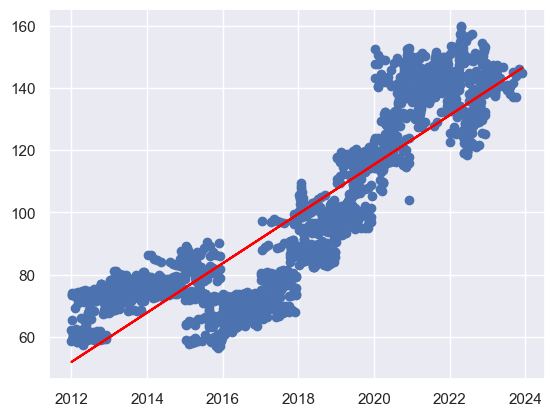

In [16]:
yfit = model.predict(x.astype(float))

plt.scatter(x, y);
plt.plot(x, yfit, color='red');

Then, we check the R-squared value 

In [24]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=yfit)

0.7885782082995971

In [25]:
def adj_r2(ytrue, ypred, N, p):
    return 1- ((1-r2_score(ytrue, ypred))*(N - 1))/(N - p - 1)

adj_r2(y, yfit, N=len(y),p=x.shape[1])

0.7885034216735977

Any R2 value less than 1.0 indicates that at least some variability in the data cannot be accounted for by the model (e.g., an R2 of 0.5 indicates that 50% of the variability in the outcome data cannot be explained by the model). So from the value of **0.78** then it means that the independent variables explain 70% of the variation in the target variable.

## Time Series Analysis

Another method that we can use is the Time Series Analysis machine learning. We can use this model to predict future stock prices below. From the model, we predicted that Walmart stock price for **2023-04-10** will be **$141.20**

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data into a pandas DataFrame
data = pd.read_csv("../Project_2/walmart_stock.csv")

# Remove dollar sign and extra spaces from 'Close' column
data['Close'] = data['Close'].str.replace('$', '').str.strip()

# Convert the other columns to float format
data['Close'] = data['Close'].astype(float)

# Convert the 'Date' column to a datetime format
data['new_Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('new_Date', inplace=True)

# Split the data into training and testing sets
X = data.index.astype(int).values.reshape(-1,1)
y = data['Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Predict the test data using the model
y_pred = reg.predict(X_test)

# Evaluate the model using the R-squared value
r2_score = reg.score(X_test, y_test)
print('R-squared:', r2_score)

#Input a future date to predict the stock price
future_date = '2023-04-10'
future_date_int = pd.to_datetime(future_date).value

#Predict the stock price using the model
future_price = reg.predict([[future_date_int]])

print(f"The predicted stock price for {future_date} is ${future_price[0]:,.2f}")

R-squared: 0.786880531024917
The predicted stock price for 2023-04-10 is $141.20


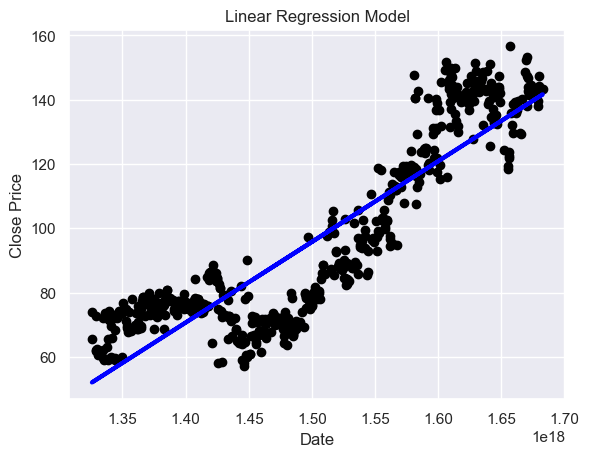

In [111]:
import matplotlib.pyplot as plt

# Create a scatter plot of the test data and predicted values
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression Model')

# Show the plot
plt.show()


So we can conclude from the machine learning algorithm that Walmart stock price will continue to increase in price year by year based on the analysis of stock price from 2012 to 2023. Investment analyst can then use this model to make business decision on whether to invest into Walmart. Although, do note that there are more variables that need to consider before making any decisions. As the people in Finance say, NFA (Not Financial Advice).

In the future, I will develop the machine learning by using SVM and ANN method.

![Alt text](../Project_2/walmart.png)